In [50]:
%pylab inline
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from scipy.special import expit
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
#         self.fc1 = nn.Linear(2, 4, bias=False)
        self.fc2 = nn.Linear(8, 1, bias=False)

    def forward(self, x):
        x1 = torch.cat((x,x),1)
        x2 = torch.cat((x,x),1)
        x3 = torch.cat((x1,x2),1)
        
#         x = F.relu(self.fc1(x))
        x4 = F.sigmoid(self.fc2(x3))

        return x4

Populating the interactive namespace from numpy and matplotlib


In [51]:
x_train = Variable( torch.Tensor(10000, 2).uniform_(-10, 10))
_, y_train = torch.max(torch.abs(x_train),1)
x_test = Variable( torch.Tensor(10000, 2).uniform_(-10000, 10000))
_, y_test = torch.max(torch.abs(x_test),1)
y_train = y_train.float()
y_test = y_test.float()

In [52]:
net(x_train)

RuntimeError: size mismatch, m1: [10000 x 8], m2: [4 x 1] at /opt/conda/conda-bld/pytorch-cpu_1518282373170/work/torch/lib/TH/generic/THTensorMath.c:1434

In [53]:
net = Net()
loss = nn.BCELoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)
loss_list = []

In [54]:
for iteration in range(5000):
    optimizer.zero_grad()
    output = net(x_train)
    loss_ = loss(output, y_train)    
    loss_list.append(loss_.data.numpy())
    loss_.backward()
    optimizer.step()

/home/praateek/miniconda3/envs/ml/lib/python3.6/site-packages/torch/nn/functional.py:1189: UserWarning: Using a target size (torch.Size([10000])) that is different to the input size (torch.Size([10000, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))


In [55]:
list(net.parameters())

[Parameter containing:
  0.2024  0.1129 -0.2913 -0.4443  0.1952  0.1319 -0.1121  0.2040
 [torch.FloatTensor of size 1x8]]

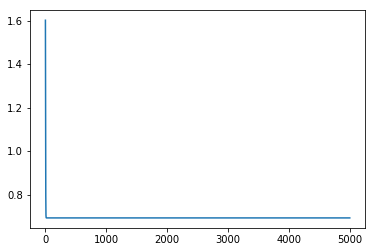

In [56]:
plt.plot(loss_list)

In [36]:
def test_accuracy(model, X, y):
    model.eval()
    correct = 0
    total = len(X)
    for i in range(total):
        y_hat = torch.round(model(X[i])).data[0]
        if int(y_hat) == int(y[i].data[0]):
            correct += 1
    return correct/float(total)


In [37]:
test_accuracy(net, x_train, y_train)

RuntimeError: dimension out of range (expected to be in range of [-1, 0], but got 1)

In [ ]:
test_accuracy(net, x_test, y_test)

In [ ]:
torch.cat((torch.randn(10,1), torch.randn(10,1)),1)

In [ ]:
A = np.asarray([[1.7605, 0.2458], [-1.5109,0.1802], [0.2135, 1.7902], [0.1446, -1.5412]]).T
B = np.asarray([ -1.6272,-1.5256,1.6225 ,1.4669])
data = x_train.data.numpy()
z = data @ A
relu = z * (z>0)
out = np.round(expit(relu @ B))


In [ ]:
ax = plt.subplot(111)
for i in range(len(data)):
    if out[i] == 1:
        plt.scatter(data[i,0],data[i,1],c='b')
    else:
        plt.scatter(data[i,0],data[i,1],c='r')
        
plt.ylim(-15,15)
plt.xlim(-15,15)


In [ ]:
c = torch.randn(10,2)

In [ ]:
torch.cat((c,c),1)

In [ ]:
np.count_nonzero(relu,axis=0)